#**Standalone Machine Learning Project for Credit Score Optimization**

##**Project Overview**:

We are seeking a Machine Learning Engineer to build a standalone machine learning project that focuses on optimizing credit card and loan payments to improve credit scores. This project will serve as a proof-of-concept and may be integrated into our main fintech application, Cashola, at a later stage.

---

##**Responsibilities**:

### Data Simulation
- Generate synthetic financial data to simulate real-world credit and loan scenarios, as the project is not yet integrated with Cashola.

### Data Preprocessing
- Clean, normalize, and transform the simulated data to make it suitable for machine learning.

### Feature Engineering
- Extract relevant variables from the simulated data to train the machine learning models effectively.

### Model Selection and Training
- Build and train machine learning models to predict and optimize credit scores based on payment strategies.

### Optimization Algorithms
- Implement algorithms to generate the most effective payment strategies for improving credit scores.

### Validation and Testing
- Validate the models and optimization algorithms using techniques like k-fold cross-validation.

### Performance Metrics
- Establish KPIs to evaluate the model's performance in terms of prediction accuracy and optimization efficiency.

### Documentation
- Prepare detailed documentation outlining the methodologies, algorithms, and validation results.

---

##**Skills Required**:

- Proficiency in Python and machine learning libraries such as scikit-learn, TensorFlow, or PyTorch.
- Strong knowledge of data preprocessing and feature engineering.
- Expertise in optimization algorithms.
- Excellent analytical and problem-solving skills.
- Strong communication skills for presenting findings and documentation.
- Familiarity with fintech and credit scoring is a plus.

---

At the end of this project, the successful candidate will deliver a machine learning model that can effectively predict and optimize credit scores based on various payment strategies. The project should also include comprehensive documentation and a roadmap for potential integration into Cashola in the future.

Qualified candidates are encouraged to apply with their updated resume, a cover letter, and examples of similar projects they've completed.


#**Data Simulation**

To facilitate the development and testing of our credit score optimization system, we need realistic financial data. As the project is not yet integrated with Cashola, we will generate synthetic data that closely resembles real-world credit and loan scenarios. This simulated dataset will serve as a crucial foundation for training and testing our machine learning models. It allows us to assess the effectiveness of various payment strategies without relying on live user data.


In [177]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

In [116]:
df=pd.read_csv('/content/loans_full_schema.csv')
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [117]:
#number of total instances
len(df)

10000

In [118]:
#columns in dataset
df.columns

Index(['emp_title', 'emp_length', 'state', 'homeownership', 'annual_income',
       'verified_income', 'debt_to_income', 'annual_income_joint',
       'verification_income_joint', 'debt_to_income_joint', 'delinq_2y',
       'months_since_last_delinq', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankr

##**Data Preprocessing**

In this step, we focus on preparing the synthetic data for effective machine learning. This involves a series of operations including cleaning, normalization, and transformation. Cleaning involves identifying and handling any inconsistencies or outliers in the dataset. Normalization ensures that the data is on a consistent scale, which is crucial for accurate model training. Transformation may involve encoding categorical variables or applying mathematical operations to extract meaningful features. The goal is to create a high-quality dataset that is well-suited for training machine learning models.


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

####**Columns with a high percentage of missing values:**

**annual_income_joint**

**verification_income_joint**

**debt_to_income_joint**

**months_since_last_delinq**

**months_since_90d_late**

**months_since_last_credit_inquiry**

**num_accounts_120d_past_due**

lets visit these columns

In [120]:
# Define the columns of interest
high_nan_value_col = df[['annual_income_joint', 'verification_income_joint', 'debt_to_income_joint', 'months_since_last_delinq', 'months_since_90d_late', 'months_since_last_credit_inquiry', 'num_accounts_120d_past_due']]

# Count null values in each column
null_counts = high_nan_value_col.isnull().sum()

null_counts


annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
months_since_last_delinq            5658
months_since_90d_late               7715
months_since_last_credit_inquiry    1271
num_accounts_120d_past_due           318
dtype: int64

We would drop:

annual_income_joint               

verification_income_joint           

debt_to_income_joint                

months_since_last_delinq            

months_since_90d_late               

In [121]:
df=df.drop(['annual_income_joint','verification_income_joint','debt_to_income_joint','months_since_last_delinq','months_since_90d_late'],axis=1)

In [122]:
#now for remain, we would drop the nan records
df=df.dropna()

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7758 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         7758 non-null   object 
 1   emp_length                        7758 non-null   float64
 2   state                             7758 non-null   object 
 3   homeownership                     7758 non-null   object 
 4   annual_income                     7758 non-null   float64
 5   verified_income                   7758 non-null   object 
 6   debt_to_income                    7758 non-null   float64
 7   delinq_2y                         7758 non-null   int64  
 8   earliest_credit_line              7758 non-null   int64  
 9   inquiries_last_12m                7758 non-null   int64  
 10  total_credit_lines                7758 non-null   int64  
 11  open_credit_lines                 7758 non-null   int64  
 12  total_

In [124]:
df.describe()

,emp_length,annual_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,7758.000000,7.758000e+03,7758.000000,7758.000000,7758.000000,7758.000000,7758.000000,7758.000000,7.758000e+03,7758.000000,...,7758.000000,7758.000000,7758.000000,7758.000000,7758.000000,7758.000000,7758.000000,7758.000000,7758.000000,7758.000000
mean,5.903326,8.342819e+04,19.180746,0.211008,2001.741557,2.268755,23.562001,11.813354,1.963714e+05,54429.293503,...,0.126708,16546.406935,43.427688,12.544959,480.990102,14568.075335,2584.987995,1971.425923,613.464813,0.097247
std,3.694738,6.875876e+04,14.789485,0.666669,7.405725,2.448717,12.090116,5.936623,1.941564e+05,56133.854349,...,0.339571,10353.572869,11.095487,5.008787,295.046153,10034.808881,4145.142868,4075.161619,525.287123,1.642787
min,0.000000,3.000000e+03,0.000000,0.000000,1963.000000,0.000000,2.000000,0.000000,0.000000e+00,0.000000,...,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,5.000000e+04,11.142500,0.000000,1998.000000,1.000000,15.000000,8.000000,5.670425e+04,21354.750000,...,0.000000,8500.000000,36.000000,9.430000,260.180000,6717.197500,947.282500,594.580000,227.580000,0.000000
50%,6.000000,7.000000e+04,17.520000,0.000000,2003.000000,2.000000,22.000000,11.000000,1.307545e+05,39699.000000,...,0.000000,15000.000000,36.000000,11.980000,402.080000,12498.945000,1606.245000,1001.630000,459.150000,0.000000
75%,10.000000,1.000000e+05,24.830000,0.000000,2006.000000,3.000000,30.000000,15.000000,2.855730e+05,68894.000000,...,0.000000,24000.000000,60.000000,15.050000,650.780000,21133.257500,2668.397500,1713.942500,840.387500,0.000000
max,10.000000,2.300000e+06,469.090000,13.000000,2015.000000,26.000000,87.000000,51.000000,3.386034e+06,942456.000000,...,3.000000,40000.000000,60.000000,30.790000,1566.590000,40000.000000,41630.443684,40000.000000,4216.440000,52.980000


##**EDA**

###**Univariate Plots**

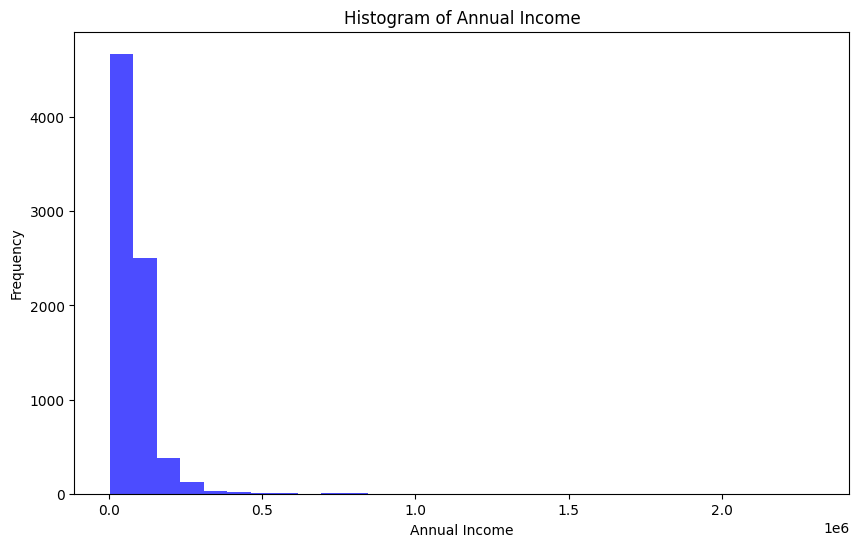

In [125]:
#Histogram of Annual Income
plt.figure(figsize=(10, 6))
plt.hist(df['annual_income'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()


Upon examination of the distribution of annual income, it is evident that the data exhibits a right-skewed pattern. This implies that there is a smaller proportion of individuals with exceptionally high income levels, while a larger portion of the population falls within the lower income brackets. This skewness in the data distribution sheds light on the income disparities within the sample, with a majority of individuals earning relatively modest incomes.

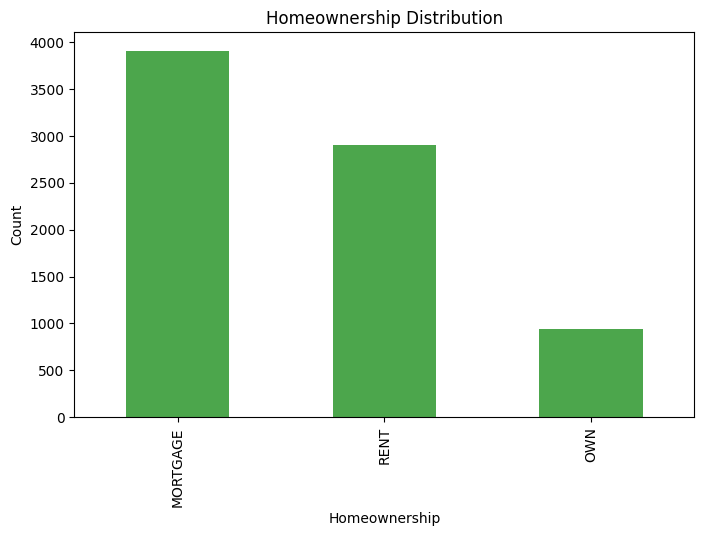

In [126]:
#Bar Plot for Homeownership
plt.figure(figsize=(8, 5))
df['homeownership'].value_counts().plot(kind='bar', color='green', alpha=0.7)
plt.title('Homeownership Distribution')
plt.xlabel('Homeownership')
plt.ylabel('Count')
plt.show()


The distribution of homeownership indicates that the majority of individuals have a mortgage, followed by those who rent, and then those who own their homes.

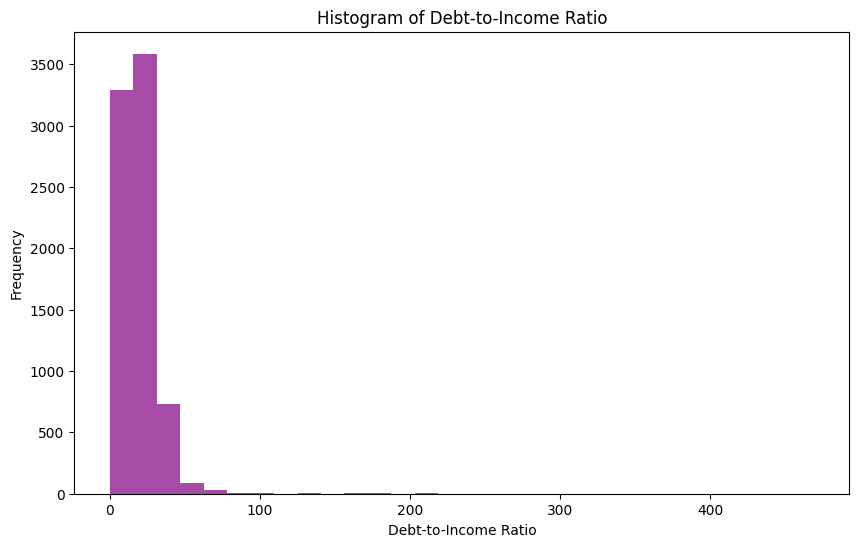

In [127]:
#Histogram of Debt-to-Income Ratio
plt.figure(figsize=(10, 6))
plt.hist(df['debt_to_income'], bins=30, color='purple', alpha=0.7)
plt.title('Histogram of Debt-to-Income Ratio')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.show()


The histogram of the debt-to-income ratio shows a right-skewed distribution. This suggests that a significant portion of individuals have a lower debt-to-income ratio, while there are fewer individuals with higher ratios.

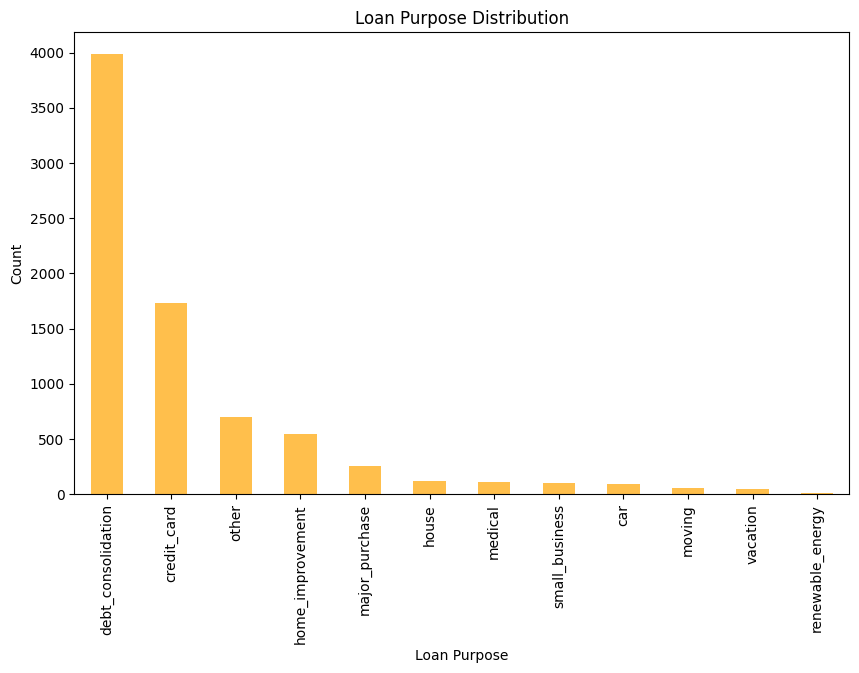

In [128]:
#Bar Plot for Loan Purpose
plt.figure(figsize=(10, 6))
df['loan_purpose'].value_counts().plot(kind='bar', color='orange', alpha=0.7)
plt.title('Loan Purpose Distribution')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.show()


###**Bivariate Plots**

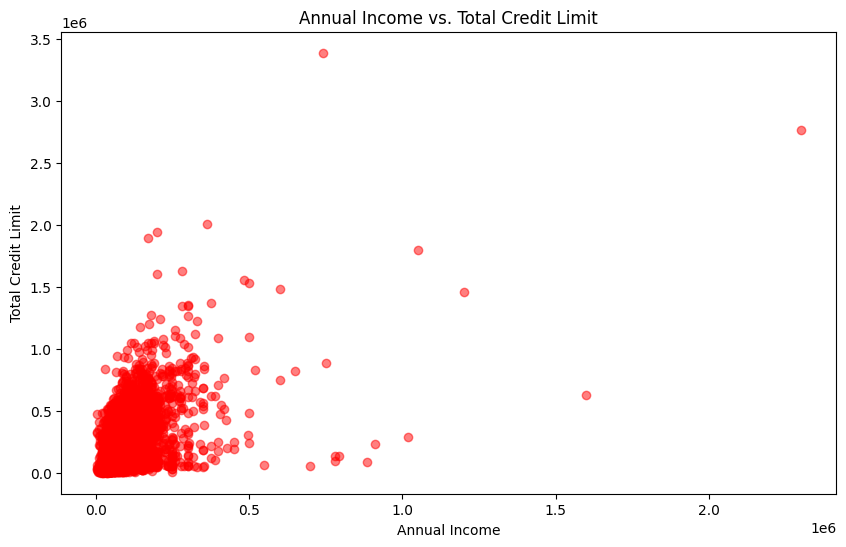

In [129]:
#Scatter Plot: Annual Income vs. Total Credit Limit
plt.figure(figsize=(10, 6))
plt.scatter(df['annual_income'], df['total_credit_limit'], color='red', alpha=0.5)
plt.title('Annual Income vs. Total Credit Limit')
plt.xlabel('Annual Income')
plt.ylabel('Total Credit Limit')
plt.show()


The scatter plot of annual income against total credit limit reveals that there is a concentration of data points towards lower values, indicating a correlation between low income and a lower credit limit. However, there are also outliers, suggesting that some individuals with high income have relatively low credit limits.

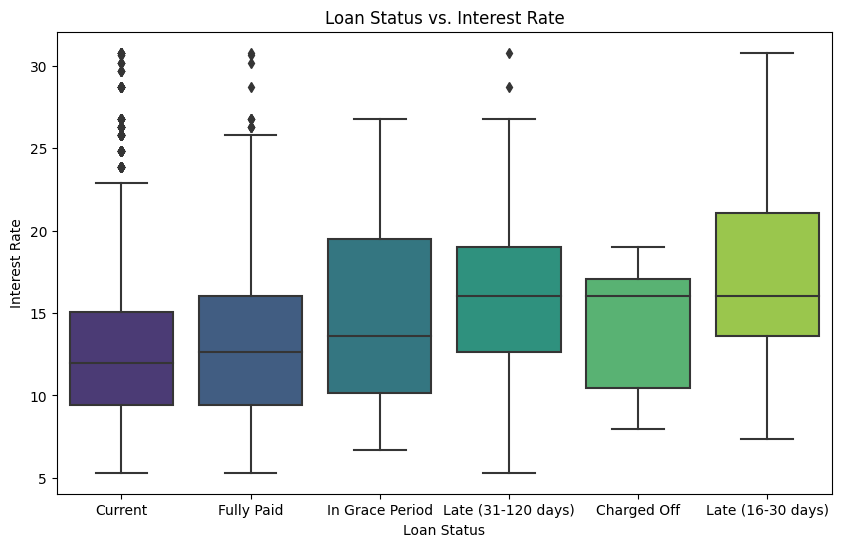

In [130]:
#Box Plot: Loan Status vs. Interest Rate
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='interest_rate', data=df, palette='viridis')
plt.title('Loan Status vs. Interest Rate')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.show()


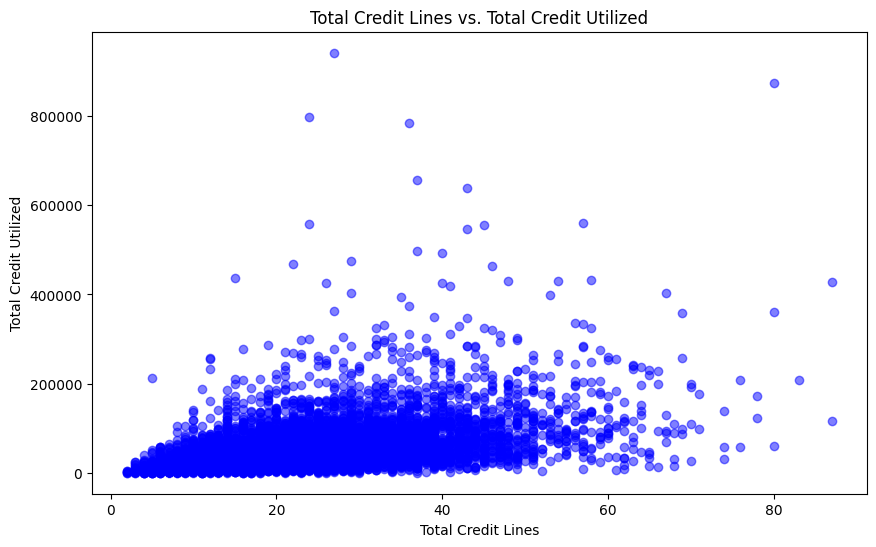

In [131]:
#Scatter Plot: Total Credit Lines vs. Total Credit Utilized
plt.figure(figsize=(10, 6))
plt.scatter(df['total_credit_lines'], df['total_credit_utilized'], color='blue', alpha=0.5)
plt.title('Total Credit Lines vs. Total Credit Utilized')
plt.xlabel('Total Credit Lines')
plt.ylabel('Total Credit Utilized')
plt.show()


The scatter plot shows that total credit utilized is predominantly low across all levels of total credit lines. This suggests that individuals tend to utilize a small portion of their available credit.

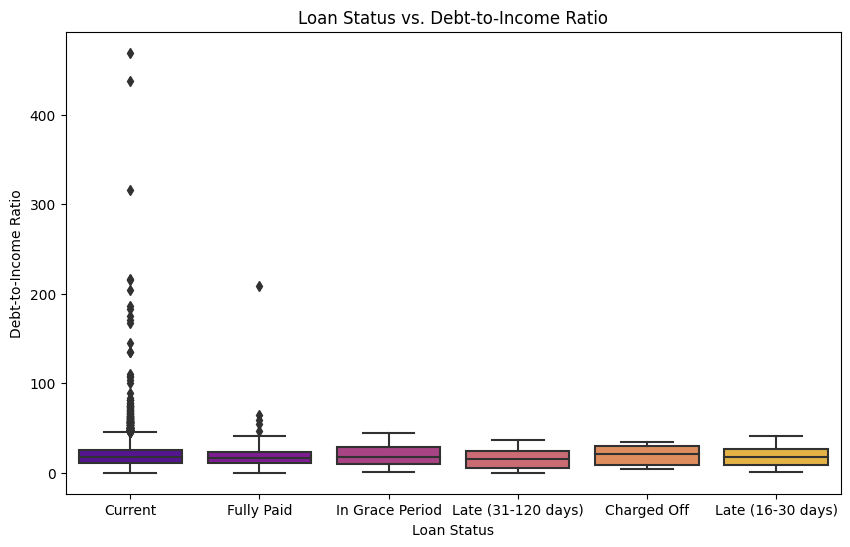

In [132]:
#Box Plot: Loan Status vs. Debt-to-Income Ratio
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='debt_to_income', data=df, palette='plasma')
plt.title('Loan Status vs. Debt-to-Income Ratio')
plt.xlabel('Loan Status')
plt.ylabel('Debt-to-Income Ratio')
plt.show()


The box plot comparing loan status with the debt-to-income ratio reveals the presence of outliers in each loan status category. This suggests that while most individuals fall within a certain range of debt-to-income ratios, there are some exceptions, potentially indicating specific financial circumstances.

###**Multivariate Plots**

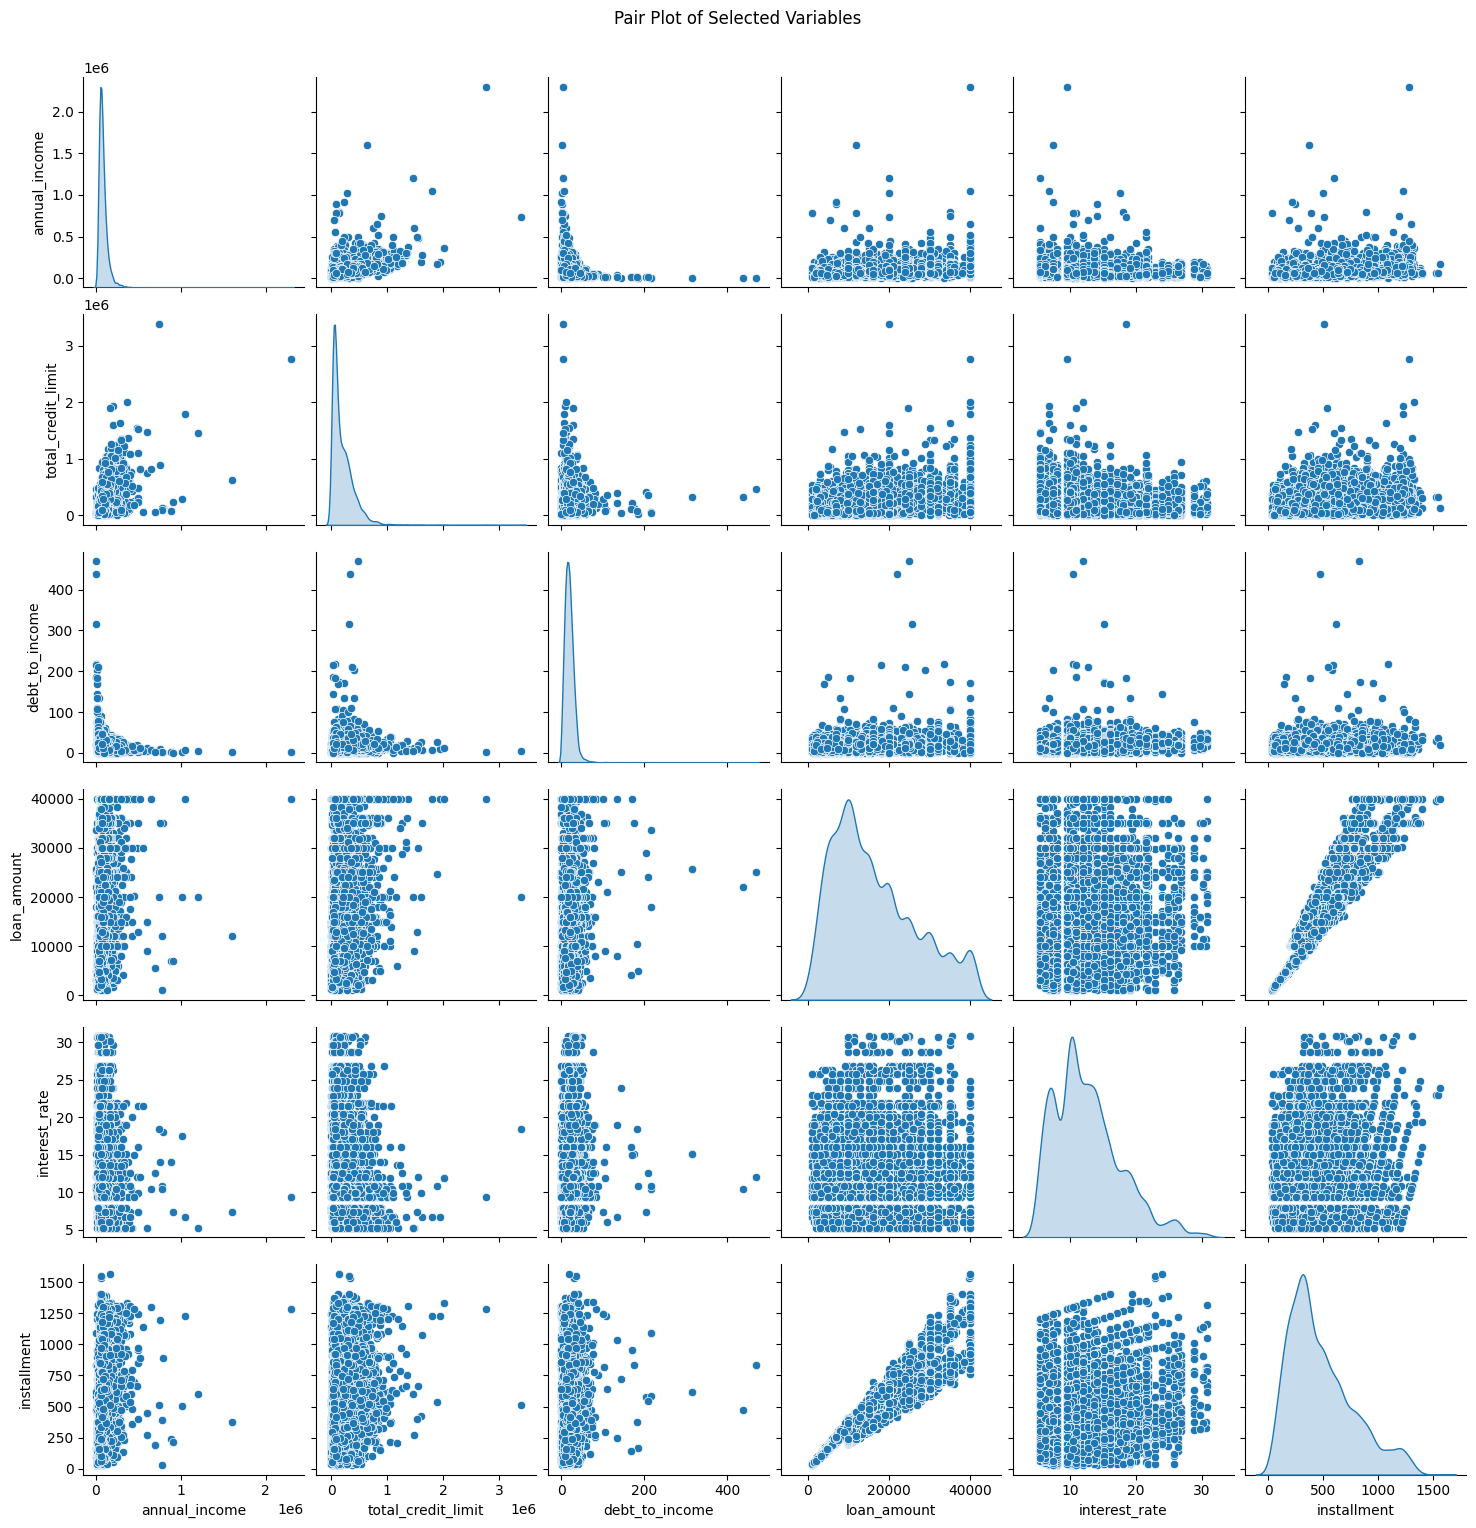

In [133]:
#Pair Plot for Selected Variables
sns.pairplot(df[['annual_income', 'total_credit_limit', 'debt_to_income', 'loan_amount', 'interest_rate', 'installment']], diag_kind='kde')
plt.suptitle('Pair Plot of Selected Variables', y=1.02)
plt.show()


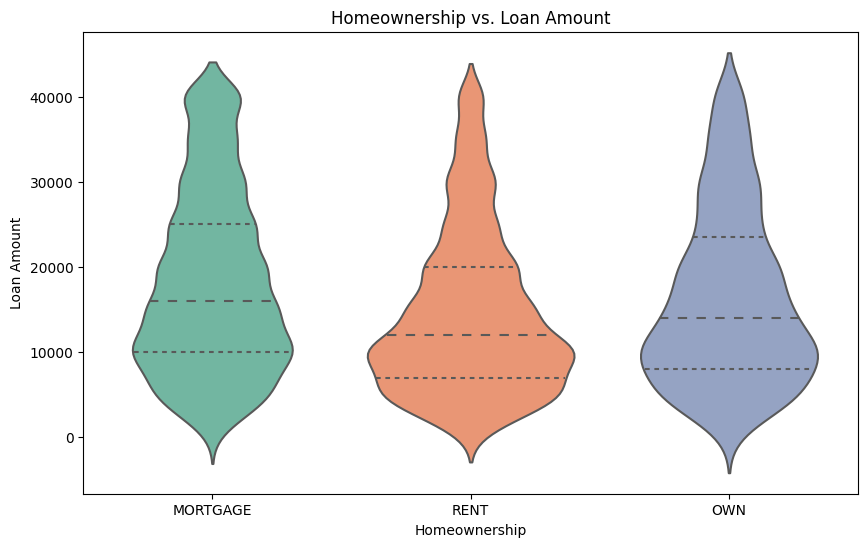

In [134]:
#Violin Plot: Homeownership vs. Loan Amount
plt.figure(figsize=(10, 6))
sns.violinplot(x='homeownership', y='loan_amount', data=df, palette='Set2', inner='quartile')
plt.title('Homeownership vs. Loan Amount')
plt.xlabel('Homeownership')
plt.ylabel('Loan Amount')
plt.show()


##**Feature Engineering**

####**Debt Ratio**
This feature helps in understanding the stability of a borrower's employment. Lenders may view borrowers with longer employment history as more stable and therefore lower risk.

In [135]:
df['debt_ratio'] = df['debt_to_income'] / df['annual_income']

####**Ratio of Open Credit Lines to Total Credit Lines**
A higher ratio may indicate a more diversified credit portfolio, which can be viewed positively by lenders.

In [136]:
df['open_credit_lines_ratio'] = df['open_credit_lines'] / df['total_credit_lines']

####**Credit Utilization Ratio**
 This ratio provides insights into how much of the available credit a person is using. High utilization may indicate financial stress.

In [137]:
df['credit_utilization_ratio'] = df['total_credit_utilized'] / df['total_credit_limit']

In [138]:
high_utilization_accounts = df[df['credit_utilization_ratio'] > 0.3]

In [139]:
len(high_utilization_accounts)

4293

In [140]:
high_utilization_accounts['Required_amount']=high_utilization_accounts['total_credit_limit']*0.3-high_utilization_accounts['balance']

<ipython-input-140-61cf89c1e2ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_utilization_accounts['Required_amount']=high_utilization_accounts['total_credit_limit']*0.3-high_utilization_accounts['balance']


In [141]:
df=high_utilization_accounts

In [143]:
df=df[df['Required_amount']>0]

##**Making Data Ready for Machine Learning**

####Data Types

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3281 entries, 2 to 9999
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         3281 non-null   object 
 1   emp_length                        3281 non-null   float64
 2   state                             3281 non-null   object 
 3   homeownership                     3281 non-null   object 
 4   annual_income                     3281 non-null   float64
 5   verified_income                   3281 non-null   object 
 6   debt_to_income                    3281 non-null   float64
 7   delinq_2y                         3281 non-null   int64  
 8   earliest_credit_line              3281 non-null   int64  
 9   inquiries_last_12m                3281 non-null   int64  
 10  total_credit_lines                3281 non-null   int64  
 11  open_credit_lines                 3281 non-null   int64  
 12  total_

In [145]:
#lets check all columns with object datatype

In [146]:
O_col=[]
for i in df.columns:
  if df[i].dtype=='object':
    O_col.append(i)

In [147]:
for i in O_col:
  print("\n\n** "+i+" **")
  print(df[i].unique())



** emp_title **
['assembly' '4th person' 'program analyst ' ... 'inspector/packer'
 'service advisor' 'da coordinator ']


** state **
['WI' 'IL' 'VA' 'NY' 'TX' 'SC' 'PA' 'MD' 'NC' 'NV' 'CO' 'CA' 'NJ' 'KY'
 'OH' 'FL' 'AZ' 'MO' 'TN' 'LA' 'MA' 'MI' 'MS' 'IN' 'GA' 'NE' 'AR' 'ME'
 'OR' 'WA' 'NM' 'MN' 'DE' 'CT' 'AL' 'OK' 'KS' 'UT' 'DC' 'ID' 'ND' 'NH'
 'RI' 'HI' 'WV' 'SD' 'MT' 'AK' 'WY' 'VT']


** homeownership **
['RENT' 'MORTGAGE' 'OWN']


** verified_income **
['Source Verified' 'Not Verified' 'Verified']


** loan_purpose **
['other' 'credit_card' 'debt_consolidation' 'moving' 'medical'
 'major_purchase' 'home_improvement' 'small_business' 'house' 'vacation'
 'car' 'renewable_energy']


** application_type **
['individual' 'joint']


** grade **
['D' 'A' 'B' 'C' 'G' 'E' 'F']


** sub_grade **
['D1' 'A3' 'A5' 'B5' 'A4' 'B1' 'D4' 'B3' 'C4' 'G1' 'C2' 'A1' 'C3' 'D3'
 'C1' 'D2' 'A2' 'E1' 'B2' 'C5' 'E2' 'E4' 'B4' 'D5' 'E3' 'F1' 'F5' 'F2'
 'E5' 'F4' 'F3']


** issue_month **
['Feb-2018' 'Mar-

#####**For title**
Standardizing job titles means making them consistent and clear. It's like giving similar jobs the same name, even if they were spelled a bit differently before. This helps in making sense of the information and lets us compare different roles more easily. It's like tidying up a messy room so that everything is in its right place. This cleaning process makes it much easier to understand and use the data effectively.

In [148]:
def standardize_title(title):
    title = title.lower()
    if 'chemist' in title:
        return 'chemist'
    elif 'pharmacist' in title:
        return 'pharmacist'
    elif 'therapist' in title:
        return 'therapist'
    elif 'technologist' in title:
        return 'technologist'
    elif 'administrator' in title:
        return 'administrator'
    elif 'counselor' in title:
        return 'counselor'
    elif 'designer' in title:
        return 'designer'
    elif 'analyst' in title:
        return 'analyst'
    elif 'plumber' in title:
        return 'plumber'
    elif 'electrician' in title:
        return 'electrician'
    elif 'researcher' in title:
        return 'researcher'
    elif 'writer' in title:
        return 'writer'
    elif 'artist' in title:
        return 'artist'
    elif 'musician' in title:
        return 'musician'
    elif 'technician' in title:
        return 'technician'
    elif 'developer' in title:
        return 'developer'
    elif 'architect' in title:
        return 'architect'
    elif 'manager' in title:
        return 'manager'
    elif 'director' in title:
        return 'director'
    elif 'president' in title:
        return 'president'
    elif 'assistant' in title:
        return 'assistant'
    elif 'consultant' in title:
        return 'consultant'
    elif 'coordinator' in title:
        return 'coordinator'
    elif 'supervisor' in title:
        return 'supervisor'
    elif 'accountant' in title:
        return 'accountant'
    elif 'doctor' in title:
        return 'doctor'
    elif 'nurse' in title:
        return 'nurse'
    elif 'engineer' in title:
        return 'engineer'
    elif 'technician' in title:
        return 'technician'
    elif 'analyst' in title:
        return 'analyst'
    elif 'officer' in title:
        return 'officer'
    elif 'chef' in title:
        return 'chef'
    elif 'architect' in title:
        return 'architect'
    elif 'lawyer' in title:
        return 'lawyer'
    elif 'librarian' in title:
        return 'librarian'
    elif 'inspector' in title:
        return 'inspector'
    elif 'clerk' in title:
      return 'clerk'
    elif 'assistant' in title:
      return 'assistant'
    else:
        return 'other'


# Apply the function to the 'emp_title' column
df['check'] = df['emp_title'].apply(standardize_title)


In [149]:
len(df['check'].unique())

34

In [150]:
len(df['emp_title'].unique())

2069

By standardizing employee titles, we went from over 2069 unique titles to just 34 categories. However, the category "other" is the most common, making it easier to manage and analyze employee data. This simplification helps in tasks like reporting, resource planning, and ensures privacy. It also makes it easier to scale as the company grows.

In [151]:
df['emp_title'] = df['emp_title'].apply(standardize_title)

In [152]:
df.drop('check',axis=1,inplace=True)

In [153]:
columns_to_encode = ['emp_title', 'state', 'homeownership', 'verified_income',
                     'loan_purpose', 'application_type', 'grade', 'sub_grade',
                     'issue_month', 'initial_listing_status', 'disbursement_method']

label_encoder = LabelEncoder()

for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

# Create a separate encoder for 'loan_status'
loan_status_encoder = LabelEncoder()
df['loan_status'] = loan_status_encoder.fit_transform(df['loan_status'])


In [154]:
for i in df.columns:
  if df[i].dtype=='object':
    print(i)

No column has object type

In [155]:
df=df.rename(columns={'credit_utilization_ratio':'credit_score'})

##**Model Selection and Training && Validation and Testing**
We will exclusively utilize regression techniques to predict and optimize credit scores based on payment strategies. Our target variable will be the 'required_amount' with the specific goal of ensuring that the credit score remains below 30.

In [156]:
df=df.dropna()

In [157]:
X=df.drop('Required_amount',axis=1)
y=df['Required_amount']

In [158]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [159]:
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [178]:
# Define regression models
models = [
    ('Random Forest Regressor', RandomForestRegressor()),
    ('Linear Regression', LinearRegression()),
    ('K-Nearest Neighbors Regressor', KNeighborsRegressor())
]

# Initialize a dictionary to store model performance
model_performance = {}

# Loop through each model
for name, model in models:
    # Train the model
    model.fit(X_train_normalized, y_train)

    # Predict using the model
    y_pred = model.predict(X_test_normalized)

    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)

    # Store performance metrics in the dictionary
    model_performance[name] = {'MAE': mae}

# Print out the performance metrics
for model, metrics in model_performance.items():
    print(f'{model} Metrics: MAE={metrics["MAE"]}')

# Find the model with the lowest Mean Absolute Error (MAE) or Mean Squared Error (MSE)
best_model = min(model_performance, key=lambda k: model_performance[k]['MAE'])
print(f'The best model is: {best_model}')


Random Forest Regressor Metrics: MAE=1701.3806455542035
Linear Regression Metrics: MAE=6.891944569386538
K-Nearest Neighbors Regressor Metrics: MAE=12718.985084043847
The best model is: Linear Regression


####using K-fold

In [179]:
scalerX = StandardScaler()
X_scaled = scalerX.fit_transform(X)

In [180]:
# Initialize a dictionary to store model MAEs
model_maes = {}

# Loop through each regression model
for name, model in models:
    # Calculate cross-validated MAE
    cv_maes = -cross_val_score(model, X_scaled, y, scoring='neg_mean_absolute_error', cv=5)  # 5-fold cross-validation

    # Store mean MAE
    mean_mae = np.mean(cv_maes)
    model_maes[name] = mean_mae

# Print out the cross-validated MAEs
for model, mae in model_maes.items():
    print(f'{model} Cross-validated MAE: {mae}')

# Find the model with the lowest MAE (since lower MAE is better)
best_model = min(model_maes, key=model_maes.get)
print(f'The best regression model is: {best_model}')


Random Forest Regressor Cross-validated MAE: 1171.4373130091976
Linear Regression Cross-validated MAE: 7.056923611301062e-11
K-Nearest Neighbors Regressor Cross-validated MAE: 11549.394167217026
The best regression model is: Linear Regression


##**Performance Metrics**

To assess the effectiveness of our regression models, we will employ key performance indicators (KPIs) focusing on two crucial aspects:

1. **Mean Absolute Error (MAE):** MAE measures the average absolute difference between the predicted and actual values. A lower MAE indicates better model performance.

2. **Mean Squared Error (MSE):** MSE measures the average of the squared differences between the predicted and actual values. It penalizes larger errors more heavily.

3. **R-squared (R²) Score:** R² indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, with higher values indicating better fit.

These metrics will provide insights into how well our regression models are performing in terms of prediction accuracy.



In [181]:
# Initialize dictionaries to store performance metrics
mean_absolute_errors = {}
mean_squared_errors = {}
r_squared_scores = {}

# Loop through each model
for name, model in models:

    # Predict the target values
    y_pred = model.predict(X_test_normalized)

    # Calculate performance metrics
    mean_absolute_errors[name] = mean_absolute_error(y_test, y_pred)
    mean_squared_errors[name] = mean_squared_error(y_test, y_pred)
    r_squared_scores[name] = r2_score(y_test, y_pred)


In [182]:
performance_metrics = {
    'Model': list(mean_absolute_errors.keys()),
    'Mean Absolute Error': list(mean_absolute_errors.values()),
    'Mean Squared Error': list(mean_squared_errors.values()),
    'R-squared': list(r_squared_scores.values())
}

df_performance_metrics = pd.DataFrame(performance_metrics)


In [183]:
df_performance_metrics

,Model,Mean Absolute Error,Mean Squared Error,R-squared
0,Random Forest Regressor,1701.380646,4.148909e+08,0.810108
1,Linear Regression,6.891945,2.507602e+04,0.999989
2,K-Nearest Neighbors Regressor,12718.985084,1.072511e+09,0.509121
